In [1]:
import subprocess
import os 
# si utilisé dans jupyter utiliser la ligne suivante, si utilisé dans VisualStudioCode utiliser la seconde
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import operator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

In [2]:
# \Dessiner la figure en 3D pour la partie de recherche des paramètres
def dessin3D(data, missionName=""):
    episilon = 0.1
    plt.figure(1)
    axes = plt.axes(projection='3d')
    list_ok_gr,list_ok_pb,list_ok_ws,list_ko_gr,list_ko_pb,list_ko_ws,list_over_gr,list_over_pb,list_over_ws = [], [], [], [], [], [], [], [], []
    for i in range(len(data)):
        gr = round(i*episilon/2,2)
        for j in range(len(data[i])):
            ws = round(j*episilon,2)
            for k in range(len(data[i][j])):
                pb = round(k*episilon,2)
                v = int(data[i,j,k])
                if(v==1):
                    list_ok_gr.append(gr)
                    list_ok_ws.append(ws)
                    list_ok_pb.append(pb)
                elif(v==2):
                    list_ko_gr.append(gr)
                    list_ko_ws.append(ws)
                    list_ko_pb.append(pb)
                elif(v==-1):
                    list_over_gr.append(gr)
                    list_over_ws.append(ws)
                    list_over_pb.append(pb)
    axes.scatter3D(list_ok_gr,list_ok_ws,list_ok_pb, c='green', marker='.', label="Found")
    #Commenter la ligne suivante pour ne pas afficher les points rouges
    #axes.scatter3D(list_ko_gr,list_ko_ws,list_ko_pb, c='red', marker='.', label="Not found")
    #Commenter la ligne suivante pour ne pas afficher les points noirs
    #axes.scatter3D(list_over_gr,list_over_ws,list_over_pb, c='black', marker='.', label="Over time")
    axes.set_xlabel('gr')
    axes.set_ylabel('ws')
    axes.set_zlabel('pb')
    axes.set_xlim([0, 0.5])
    axes.set_ylim([0, 1])
    axes.set_zlim([0, 1])
    plt.legend(loc="upper right")
    plt.title("Mission "+missionName,fontsize=20)
    plt.show()

In [3]:
# \Dessine pour chaque combinaison de paramètre un point dont la taille est proportionnelle au nombre fois que ce jeu de paramètre permet de trouver la solution attendue
def dessinPerf(fileList):
    episilon = 0.1
    
    plt.figure(3)
    axes = plt.axes(projection='3d')

    # La matrice qui va contenir pour chaque triplet de paramètre sa performance (le nombre de fois qu'il permet de trouver une solution)
    parametersPerformance = []
    # Parcourir tous les cas et comptabiliser les performances
    max = 0
    for n in range(len(fileList)):
        targetFileName = fileList[n]
        file = "files_npy/filled_"+targetFileName+".npy"
        data = np.load(file)
        # Si la matrice de performance n'est pas initialisée, la définir de la même taille que les data de cette première analyse
        if (len(parametersPerformance) == 0):
            for plan in data:
                parametersPerformance.append([])
                for line in plan:
                    parametersPerformance[-1].append([])
                    for dot in line:
                        parametersPerformance[-1][-1].append([])
        testNumber = targetFileName.split("_")[0]
        # Parcourir tous les gr du cas en cours
        for i in range(len(data)):
            # Parcourir tous les ws du cas en cours
            for j in range(len(data[i])):
                # Parcourir tous les pb du cas en cours
                for k in range(len(data[i][j])):
                    v = int(data[i,j,k])
                    if (v==1):
                        # On ajoute pour ce point là le numéro du test pour ce noter qu'il a été positif pour ce test
                        parametersPerformance[i][j][k].append(testNumber)
                        # Si la longueur de la liste est plus grande que le max, on le met à jour
                        if (len(parametersPerformance[i][j][k]) > max):
                            max = len(parametersPerformance[i][j][k])
                    ## Si les paramètres i, j et k ont été évalués positivement OU qu'ils n'ont pas été évalué mais que sont voisinnage l'a été (il faut regarder k-1 (en dessous), j-1 (à gauche) et i-1 (en arrière)), on note ces paramètres comme positif, si non on le note comme négatif
                    #if (v==1 or (v==0 and (k-1 > 0 and int(data[i,j,k-1]) == 1) or (j-1 > 0 and int(data[i,j-1,k]) == 1) or (i-1 > 0 and int(data[i-1,j,k]) == 1))):
                    #    data[i,j,k] = 1
                    #    # On ajoute pour ce point là le numéro du test pour se noter qu'il a été positif pour ce test
                    #    parametersPerformance[i][j][k].append(targetFileName.split("_")[0])
                    #    # Si la longueur de la liste est plus grande que le max, on le met à jour
                    #    if (len(parametersPerformance[i][j][k]) > max):
                    #        max = len(parametersPerformance[i][j][k])
    print(max)
    
    # Créer les vecteurs X, Y, Z, et Size
    vec_X = []
    vec_Y = []
    vec_Z = []
    vec_Size = []
    # Parcourir tous les gr du cas en cours
    for i in range(len(data)):
        gr = round(i*episilon/2,2)
        # Parcourir tous les ws du cas en cours
        for j in range(len(data[i])):
            ws = round(j*episilon,2)
            # Parcourir tous les pb du cas en cours
            for k in range(len(data[i][j])):
                if (len(parametersPerformance[i][j][k])/len(fileList) >= 0.8):
                    pb = round(k*episilon,2)
                    #print ("gr: ", gr, ", ws: ", ws, ", pb: ", pb, " => ", parametersPerformance[i][j][k])
                    vec_X.append(gr)
                    vec_Y.append(ws)
                    vec_Z.append(pb)
                    vec_Size.append(len(parametersPerformance[i][j][k])**2)

    axes.scatter3D(vec_X,vec_Y,vec_Z,s=vec_Size, c='green', marker='.')
    axes.set_xlabel('gr')
    axes.set_ylabel('ws')
    axes.set_zlabel('pb')
    axes.set_xlim([0, 0.5])
    axes.set_ylim([0, 1])
    axes.set_zlim([0, 1])
    plt.title("Performance",fontsize=20)
    plt.show()

FOR  files_npy/2_simpleBoucle.npy 

Chaque point représente une compression, si le point est vert cela signifie que les paramètres (gs, gr et pb) ont permis de construire la solution recherchée, si le point est rouge cela signifie que les paramètres ont permis une construire une solution différente de la solution recherchée, si le point est noir cela signifie que ce jeu de paramètres n'a pas permis de construire une solution dans le temps imparti


<IPython.core.display.Javascript object>


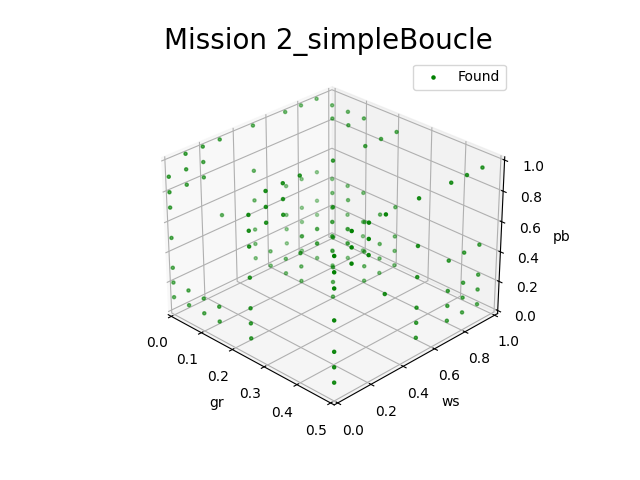

In [9]:
# ["1_rienAFaire"], "2_simpleBoucle", "3_simpleBoucleAvecDebut", "4_simpleBoucleAvecFin", "5_simpleBoucleAvecDebutEtFin", "6.01_simpleBoucleAvecIf", "6.02_simpleBoucleAvecIf", "6.03_simpleBoucleAvecIf", "6.04_simpleBoucleAvecIf", "6.05_simpleBoucleAvecIf", "6.06_simpleBoucleAvecIf", "6.07_simpleBoucleAvecIf", "6.08_simpleBoucleAvecIf", "6.09_simpleBoucleAvecIf", "6.10_simpleBoucleAvecIf", "6.11_simpleBoucleAvecIf", "6.12_simpleBoucleAvecIf", "6.13_simpleBoucleAvecIf", "6.14_simpleBoucleAvecIf", "7.01_bouclesEnSequence", "7.02_bouclesEnSequence", "8_bouclesEnSequenceAvecIf", "9.01_bouclesImbriquees", "9.02_bouclesImbriquees", "9.03_bouclesImbriquees"]
mission = "2_simpleBoucle"
dossier = "."
file = "files_npy/"+mission+".npy"
print("FOR ",file,"\n")
print("Chaque point représente une compression, si le point est vert cela signifie que les paramètres (gs, gr et pb) ont permis de construire la solution recherchée, si le point est rouge cela signifie que les paramètres ont permis une construire une solution différente de la solution recherchée, si le point est noir cela signifie que ce jeu de paramètres n'a pas permis de construire une solution dans le temps imparti")
data = np.load(file)
dessin3D(data, missionName=mission)

Analyse de la performance des paramètres

La taille de chaque point représente sa performance, plus le point est gros plus cette combinaison de paramètre aura permis de trouver la meilleure solution dans les différents cas


<IPython.core.display.Javascript object>


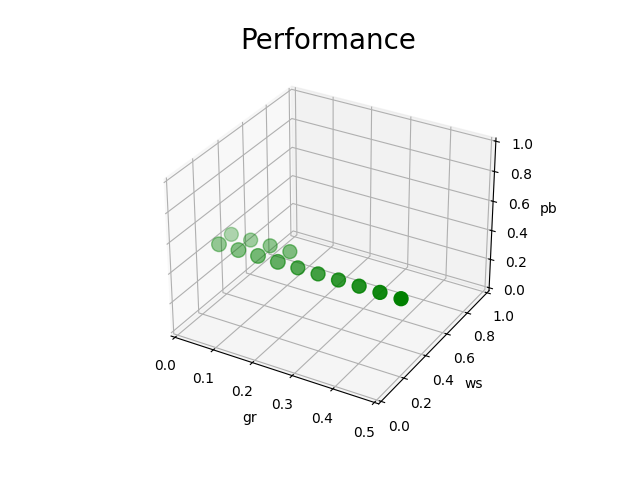

21


In [11]:
files = ["1_rienAFaire", "2_simpleBoucle", "3_simpleBoucleAvecDebut", "4_simpleBoucleAvecFin", "5_simpleBoucleAvecDebutEtFin", "6.01_simpleBoucleAvecIf", "6.02_simpleBoucleAvecIf", "6.03_simpleBoucleAvecIf", "6.04_simpleBoucleAvecIf", "6.05_simpleBoucleAvecIf", "6.06_simpleBoucleAvecIf", "6.07_simpleBoucleAvecIf", "6.08_simpleBoucleAvecIf", "6.09_simpleBoucleAvecIf", "6.10_simpleBoucleAvecIf", "6.11_simpleBoucleAvecIf", "6.12_simpleBoucleAvecIf", "6.13_simpleBoucleAvecIf", "6.14_simpleBoucleAvecIf", "7.01_bouclesEnSequence", "7.02_bouclesEnSequence", "8_bouclesEnSequenceAvecIf", "9.01_bouclesImbriquees", "9.02_bouclesImbriquees", "9.03_bouclesImbriquees"]
#files = ["7.02_bouclesEnSequence"]

print("Analyse de la performance des paramètres\n")
print("La taille de chaque point représente sa performance, plus le point est gros plus cette combinaison de paramètre aura permis de trouver la meilleure solution dans les différents cas")
dessinPerf(files)
    

In [6]:
def dessinPossibles(data, missionName=""):
    episilon = 0.1
    plt.figure(2)
    axes = plt.axes(projection='3d')
    mini = 1
    maxi = int(data.max())
    num_possible = maxi-mini+1
    colors = []
    for n in range(num_possible+2):
        temp =random.randint(0, 16**6+1)
        s = hex(temp)
        head = "#"
        s = s[2:]
        for k in range(6-len(s)):
            head += "0"
        s = head+s
        colors.append(s)
        
    for i in range(len(data)):
        gr = round(i*episilon/2,2)
        for j in range(len(data[i])):
            ws = round(j*episilon,2)
            for k in range(len(data[i][j])):
                pb = round(k*episilon,2)
                v = int(data[i,j,k])
                if(v==0):
                    continue
                couleur = colors[v]
                axes.scatter3D(gr,ws,pb, c=couleur, marker='.')
    axes.set_xlabel('gr')
    axes.set_ylabel('ws')
    axes.set_zlabel('pb')
    axes.set_xlim([0, 0.5])
    axes.set_ylim([0, 1])
    axes.set_zlim([0, 1])
    plt.title("Mission "+missionName+" : "+str(num_possible)+" compression(s) différente(s)",fontsize=12)
    plt.show()

FOR  files_npy/possible_6.01_simpleBoucleAvecIf.npy 

Chaque point représente une compression, si deux points ont la même couleur cela signifie que les deux combinaisons de paramètres (gs, gr et pb) ont donné le même résultat de compression


<IPython.core.display.Javascript object>


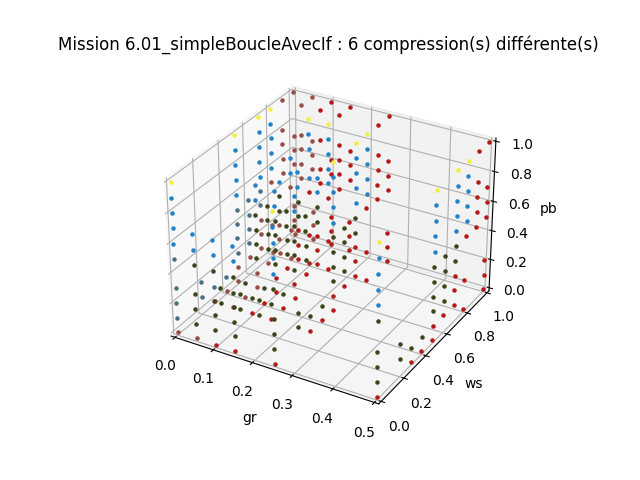

In [7]:
mission = "6.01_simpleBoucleAvecIf"
dossier = "."
# file = "files_npy_nonRect/possible_"+mission+".npy"
file = "files_npy/possible_"+mission+".npy"
print("FOR ",file,"\n")
print("Chaque point représente une compression, si deux points ont la même couleur cela signifie que les deux combinaisons de paramètres (gs, gr et pb) ont donné le même résultat de compression")
data = np.load(file)
dessinPossibles(data, missionName=mission)

In [8]:
import decimal
from decimal import Decimal, getcontext
print(getcontext())
print (Decimal(1/3))
print(getattr(decimal, 'ROUND_FLOOR'))

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
0.333333333333333314829616256247390992939472198486328125
ROUND_FLOOR
